# 01 - Santiago aoi

This notebook uploads from local to database Santiago's (Chile) area of interest

In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import osmnx as ox
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

In [6]:
##### WARNING ##### WARNING ##### WARNING ##### WARNING ##### WARNING #####

# save output to database?
save = True

##### WARNING ##### WARNING ##### WARNING ##### WARNING ##### WARNING #####

## Load data and add city column

In [2]:
aoi_dir = "../../../data/external/temporal_todocker/santiago/proximidad/poligonosantiago_32719.gpkg"
aoi_gdf = gpd.read_file(aoi_dir)
aoi_gdf = aoi_gdf.to_crs("EPSG:4326")

# Show
print(aoi_gdf.shape)
aoi_gdf.head(2)

(1, 2)


,id,geometry
0,None,"MULTIPOLYGON (((-70.62985 -33.35908, -70.62627..."


<Axes: >

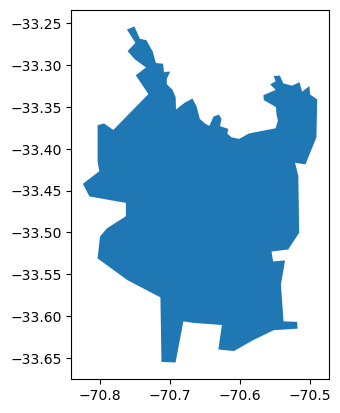

In [3]:
aoi_gdf.plot()

In [4]:
aoi_gdf['city'] = 'Santiago'
aoi_gdf = aoi_gdf[['city','geometry']]

# Show
print(aoi_gdf.shape)
aoi_gdf.head(2)

(1, 2)


,city,geometry
0,Santiago,"MULTIPOLYGON (((-70.62985 -33.35908, -70.62627..."


## Save to database

In [7]:
save_schema = 'projects_research'
save_table = 'santiago_aoi'

if save:
    aup.gdf_to_db_slow(aoi_gdf, save_table, save_schema, if_exists='append')